In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./311_Service_Requests_from_2010_to_Present (1).csv.crdownload')
data.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01/01/2016 01:50:11 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01/01/2016 01:53:54 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01/01/2016 01:42:54 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01/01/2016 08:27:32 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01/01/2016 01:17:40 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


# 1. Understand the dataset: 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349010 entries, 0 to 349009
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      349010 non-null  int64  
 1   Created Date                    349010 non-null  object 
 2   Closed Date                     346671 non-null  object 
 3   Agency                          349010 non-null  object 
 4   Agency Name                     349010 non-null  object 
 5   Complaint Type                  349010 non-null  object 
 6   Descriptor                      342669 non-null  object 
 7   Location Type                   348877 non-null  object 
 8   Incident Zip                    346097 non-null  float64
 9   Incident Address                298957 non-null  object 
 10  Street Name                     298957 non-null  object 
 11  Cross Street 1                  293622 non-null  object 
 12  Cross Street 2  

In [4]:
data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.490100e+05,346097.000000,3.450860e+05,345086.000000,0.0,0.0,0.0,0.0,0.0,345085.000000,345085.000000
mean,3.112679e+07,10857.017270,1.005036e+06,203497.192877,NaN,NaN,NaN,NaN,NaN,40.725178,-73.924971
std,6.888669e+05,579.680371,2.193846e+04,29855.423334,NaN,NaN,NaN,NaN,NaN,0.081944,0.079122
min,2.978258e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.057700e+07,10312.000000,9.919790e+05,183055.250000,NaN,NaN,NaN,NaN,NaN,40.669037,-73.972129
50%,3.114188e+07,11209.000000,1.003422e+06,201041.000000,NaN,NaN,NaN,NaN,NaN,40.718451,-73.930785
75%,3.170463e+07,11238.000000,1.019068e+06,222946.000000,NaN,NaN,NaN,NaN,NaN,40.778575,-73.874342
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [5]:
data.isnull().mean()*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.670181
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.816853
Location Type                       0.038108
Incident Zip                        0.834647
Incident Address                   14.341423
Street Name                        14.341423
Cross Street 1                     15.870032
Cross Street 2                     16.039655
Intersection Street 1              85.821037
Intersection Street 2              85.989227
Address Type                        0.904559
City                                0.834360
Landmark                           99.893413
Facility Type                       0.672474
Status                              0.000000
Due Date                            0.000860
Resolution Description              0.000000
Resolution

In [6]:
data.sample()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
286325,30401006,04/15/2015 10:33:54 AM,04/15/2015 02:47:34 PM,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11355.0,138-04 58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.745405,-73.827057,"(40.745404804206494, -73.82705731595821)"


In [7]:
data.shape

(349010, 53)

In [8]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
349005    False
349006    False
349007    False
349008    False
349009    False
Length: 349010, dtype: bool

In [9]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

#### REMOVING WHITE SPACES IN COLUMN NAMES

In [10]:
data.columns=data.columns.str.replace(' ','')
data.head(2)

,UniqueKey,CreatedDate,ClosedDate,Agency,AgencyName,ComplaintType,Descriptor,LocationType,IncidentZip,IncidentAddress,...,BridgeHighwayName,BridgeHighwayDirection,RoadRamp,BridgeHighwaySegment,GarageLotName,FerryDirection,FerryTerminalName,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


# Perform basic data exploratory analysis

<b>Null Value plot

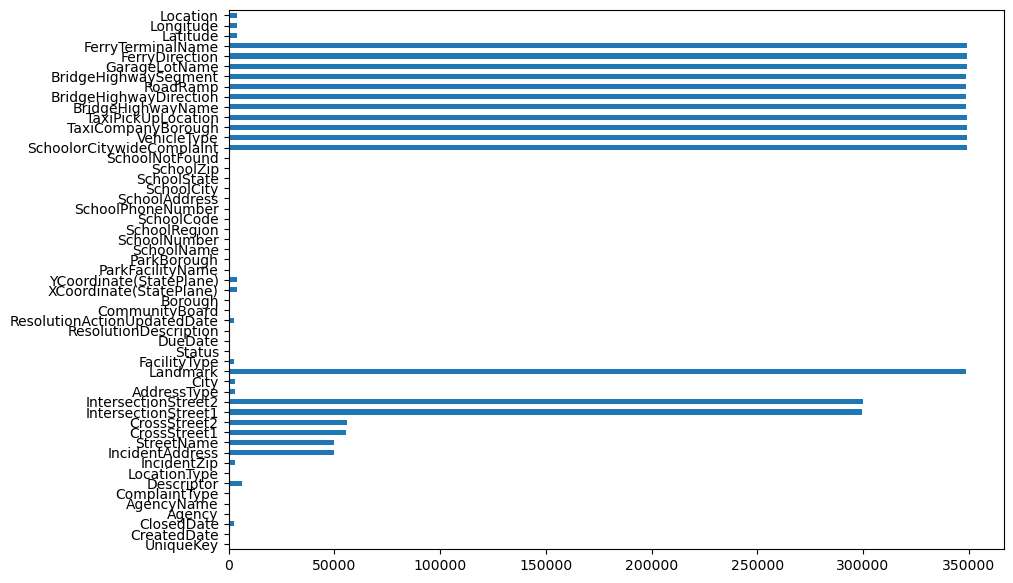

In [11]:
plt.figure(figsize=(10,7))
data.isnull().sum().plot.barh()
plt.show()

###  2.2 Missing value treatment 2.2.1 Remove the records whose Closed Date values are null

In [12]:
data.ClosedDate.isnull().sum()

2339

In [13]:
data.dropna(subset=['ClosedDate'],inplace= True)
data.head()

,UniqueKey,CreatedDate,ClosedDate,Agency,AgencyName,ComplaintType,Descriptor,LocationType,IncidentZip,IncidentAddress,...,BridgeHighwayName,BridgeHighwayDirection,RoadRamp,BridgeHighwaySegment,GarageLotName,FerryDirection,FerryTerminalName,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [14]:
data.ClosedDate.isnull().sum()

0

<b> 2.3 Analyze the date column, and remove entries that have an
incorrect timeline

In [ ]:
data['CreatedDate']=pd.to_datetime(data['CreatedDate'],errors='ignore')

In [ ]:
data['ClosedDate']=pd.to_datetime(data['ClosedDate'],errors='ignore')

<B> 2.3.1 Calculate the time elapsed in closed and creation date

In [ ]:
data['ElapsedTime']=data['CreatedDate']-data['ClosedDate']

In [ ]:
data['time_in_second']=data["ElapsedTime"].dt.seconds
data.head()

<b>2.3.2 Convert the calculated date to seconds to get a better
representation

In [ ]:
data['second']=data.ElapsedTime.dt.seconds
data.head()

<b>2.3.3 View the descriptive statistics for the newly created
column

In [ ]:
data.second.describe()

<b>2.3.4 Check the number of null values in the Complaint_Type and City columns

In [ ]:
data.ComplaintType.isnull().sum()

In [ ]:
data.City.isnull().sum()

<b>2.3.5 Impute the NA value with Unknown City

In [ ]:
data.City.replace(np.nan,'unknown city',inplace=True)

<b>Parse date

In [ ]:
data['CreatedDate']=pd.to_datetime(data['CreatedDate'],errors='ignore')

In [ ]:
data['ClosedDate']=pd.to_datetime(data['ClosedDate'],errors='ignore')

In [ ]:
data['DueDate']=pd.to_datetime(data['DueDate'],errors='ignore')

In [ ]:
data['ResolutionActionUpdatedDate']=pd.to_datetime(data['ResolutionActionUpdatedDate'],errors='ignore')

In [ ]:
data.head()

In [ ]:
data.City.isnull().sum()

In [ ]:
data.City.unique()

<b> 2.3.6 Draw a frequency plot for the complaints in each city

In [ ]:
pd.crosstab(data.ComplaintType,data.City).plot.bar()
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
data.groupby(['City','ComplaintType']).count()

In [ ]:
data.ComplaintType.count()

In [ ]:
data.City.count()

In [ ]:
data.ComplaintType.unique()

<b>2.3.7 Create a scatter and hexbin plot of the concentration of
complaints across Brooklyn

In [ ]:
data.City

In [ ]:
Brooklyn=data.query("City=='Brooklyn'")
    

In [ ]:
Brooklyn

In [ ]:
sns.scatterplot( data = Brooklyn, x = 'Latitude',y = 'Longitude',alpha=1 )
plt.show()

In [ ]:
data[['Longitude', 'Latitude']].plot(kind = 'hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet', mincnt=1, title = 'Complaints Concentration in Brooklyn', figsize = (9, 4));

## 3. Find major types of complaints: 

<b>3.1 Plot a bar graph to show the types of complaints

In [ ]:
def to_title(city):
    try:
        city = city.title()
        return city
    except:
        return np.nan

data['City'] = data['City'].apply(to_title)
data['City'].value_counts()

In [ ]:
data['ComplaintType'].value_counts()

In [ ]:
data.groupby(['City', 'ComplaintType']).size()

In [ ]:
data['ComplaintType'].value_counts().plot(kind = 'bar', title = 'Overall ComplaintType Frequency');

<b>3.2 Check the frequency of various types of complaints for New
York City

In [ ]:
nyc_data = data[data['City'] == 'NEW YORK']

complaints_by_type_nyc = nyc_data['ComplaintType'].value_counts()

print(complaints_by_type_nyc)


<b>3.3 Find the top 10 complaint types

In [ ]:
complaint_types_freq = data['ComplaintType'].value_counts()

top_10_complaint_types = complaint_types_freq.head(10)

print(top_10_complaint_types)


<b>3.4 Display the various types of complaints in each city

In [ ]:
complaints_by_city_and_type = data.groupby(['City', 'ComplaintType']).size()

complaints_by_city_and_type = complaints_by_city_and_type.reset_index(name='Count')

print(complaints_by_city_and_type)


<b>3.5 Create a DataFrame, df_new, which contains cities as
columns and complaint types in rows

In [ ]:
data_new = data.pivot_table(index='ComplaintType', columns='City', aggfunc='size', fill_value=0)

print(data_new)

<b> 4. Visualize the major types of complaints in each city

<B>4.1 Draw another chart that shows the types of complaints in
each city in a single chart, where different colors show the
different types of complaints

In [ ]:
complaints_by_city_and_type = data.groupby(['City', 'ComplaintType']).size().unstack(fill_value=0)
complaints_by_city_and_type.plot.bar()

<b>4.2 Sort the complaint types based on the average
Request_Closing_Time grouping them for different
locations

In [ ]:
data['CreatedDate'] = pd.to_datetime(data['CreatedDate'])
data['ClosedDate'] = pd.to_datetime(data['ClosedDate'])

data['Request_Closing_Time'] = (data['ClosedDate'] - data['CreatedDate']).dt.total_seconds() / 3600  

complaints_by_type_and_location = data.groupby(['ComplaintType', 'City'])['Request_Closing_Time'].mean().reset_index()

sorted_complaints = complaints_by_type_and_location.sort_values(by='Request_Closing_Time')

print(sorted_complaints)


<b>5. See whether the average response time across different
complaint types is similar (overall)



In [ ]:
data['Request_Closing_Time'] = (data['ClosedDate'] - data['CreatedDate']).dt.total_seconds() / 3600  # in hours

overall_average_response_time = data['Request_Closing_Time'].mean()

average_response_time_by_complaint = data.groupby('ComplaintType')['Request_Closing_Time'].mean()

print("Overall Average Response Time: {:.2f} hours".format(overall_average_response_time))
print("\nAverage Response Time by Complaint Type:")
print(average_response_time_by_complaint)

<b> 5.1 Visualize the average of Request_Closing_Time

In [ ]:
data['CreatedDate'] = pd.to_datetime(data['CreatedDate'])
data['ClosedDate'] = pd.to_datetime(data['ClosedDate'])

data['Request_Closing_Time'] = (data['ClosedDate'] - data['CreatedDate']).dt.total_seconds() / 3600  # in hours

overall_average_response_time = data['Request_Closing_Time'].mean()

average_response_time_by_complaint = data.groupby('ComplaintType')['Request_Closing_Time'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_response_time_by_complaint['ComplaintType'], average_response_time_by_complaint['Request_Closing_Time'], color='skyblue')
plt.axhline(y=overall_average_response_time, color='red', linestyle='--', label='Overall Average')
plt.xlabel('ComplaintType')
plt.ylabel('Average Request Closing Time (hours)')
plt.title('Average Request Closing Time by Complaint Type')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<b>6. Identify the significant variables by performing statistical
analysis using p-values


<b>To identify significant variables through statistical analysis using p-values, we can perform a statistical test such as the Analysis of Variance (ANOVA) or t-test, depending on the type of data and the specific analysis you are interested in. The p-value will help determine whether the variation observed in a specific variable is statistically significant or just due to random chance. This test is suitable when you have multiple groups (e.g., complaint types) and want to assess whether there are statistically significant differences in a continuous variable (e.g., Request_Closing_Time) across those groups.

<b>Assumptions for ANOVA:

<b>The samples are independent. The data is approximately normally distributed within each group. Homogeneity of variances (equal variance) among the groups.

In [ ]:
import scipy.stats as stats

data['Request_Closing_Time'] = (data['ClosedDate'] - data['CreatedDate']).dt.total_seconds() / 3600  # in hours

# Perform one-way ANOVA to identify significant variables
# Here, 'Complaint Type' is the categorical variable and 'Request_Closing_Time' is the continuous variable
anova_result = stats.f_oneway(*[group['Request_Closing_Time'] for name, group in data.groupby('ComplaintType')])

# Get the p-value from the ANOVA result
p_value = anova_result.pvalue

# Print the p-value
print("P-value:", p_value)

# Check if the p-value is significant (typically < 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference among the complaint types.")
else:
    print("There is no statistically significant difference among the complaint types.")


###### 7. Perform a Kruskal-WallisH test¶

<B> If the assumptions for performing the one-way ANOVA are not met (i.e., the 
data is not normally distributed or the variance is not equal among the groups), the Kruskal-Wallis test can be used as a non-parametric alternative. The Kruskal-Wallis test is suitable for analyzing continuous variables across multiple groups
(complaint types) when the data is non-normally distributed.

In [ ]:
# Perform Kruskal-Wallis test to identify significant variables
# Here, 'Complaint Type' is the categorical variable and 'Request_Closing_Time' is the continuous variable
kw_result = stats.kruskal(*[group['Request_Closing_Time'] for name, group in data.groupby('ComplaintType')])

# Get the p-value from the Kruskal-Wallis test result
p_value = kw_result.pvalue

# Print the p-value
print("P-value:", p_value)

# Check if the p-value is significant (typically < 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference among the complaint types.")
else:
    print("There is no statistically significant difference among the complaint types.")

<b>7. Perform a Kruskal-Wallis H test
    
<B>7.1 Fail to reject H0: All sample distributions are equal

if the p-value obtained from the Kruskal-Wallis test (or any statistical test) is greater than or equal to the chosen significance level (e.g., 0.05), we fail to reject the null hypothesis (H0). In this context, the null hypothesis states that the sample distributions (in this case, the Request_Closing_Time for each complaint type) are equal, meaning there is no statistically significant difference among the groups (complaint types).

Thus, if the p-value is not statistically significant (greater than 0.05), we do not have enough evidence to claim that the Request_Closing_Time is significantly different across different complaint types. In other words, we cannot reject the possibility that the Request_Closing_Time is the same for all complaint types based on the available data.

<b>7.2 Reject H0: One or more sample distributions are not
equal

If the p-value obtained from the Kruskal-Wallis test (or any statistical test) is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis (H0). In the context of the Kruskal-Wallis test, rejecting the null hypothesis means that there is sufficient evidence to suggest that at least one of the sample distributions (in this case, the Request_Closing_Time for at least one complaint type) is statistically significantly different from the others.

In simpler terms, if the p-value is statistically significant (less than 0.05), we can conclude that there is a statistically significant difference in Request_Closing_Time among different complaint types. We can then proceed with further post-hoc tests or additional analyses to identify which complaint types are significantly different from each other.